<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/4lstm_non_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

!pip install --upgrade scikit-learn

import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


load korpus

In [2]:
url1 = '/content/drive/MyDrive/dataisear(preputama).csv'
url2 = '/content/drive/MyDrive/dataisear(preptambah).csv'
df = pd.read_csv(url1)

In [3]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

cari paling panjang dalam korpus

In [4]:
paling_panjang=0
i=0
ke=0
for x in df.dokumen:
  if paling_panjang<len(x):
    paling_panjang=len(x)
    kata=x
    ke=i
  i+=1
print(paling_panjang)
print(kata)
print(ke)

178
['a', 'few', 'days', 'back', 'i', 'was', 'waiting', 'for', 'the', 'bus', 'at', 'the', 'bus', 'stop', 'before', 'getting', 'into', 'the', 'bus', 'i', 'had', 'prepared', 'the', 'exact', 'amount', 'of', 'coins', 'to', 'pay', 'for', 'the', 'bus', 'fair', 'and', 'when', 'i', 'got', 'into', 'the', 'bus', 'i', 'put', 'these', 'coins', 'into', 'the', 'box', 'meant', 'to', 'collect', 'the', 'bus', 'fair', 'i', 'thought', 'that', 'i', 'had', 'paid', 'and', 'wanted', 'to', 'get', 'inside', 'however', 'the', 'bus', 'driver', 'called', 'me', 'and', 'asked', 'me', 'in', 'an', 'impolite', 'way', 'if', 'the', 'coins', 'were', 'stuck', 'at', 'the', 'opening', 'of', 'the', 'box', 'he', 'had', 'not', 'seen', 'me', 'paying', 'and', 'there', 'wasnt', 'a', 'stack', 'of', 'coins', 'in', 'the', 'box', 'i', 'could', 'not', 'understand', 'this', 'and', 'the', 'driver', 'kept', 'questioning', 'me', 'he', 'made', 'me', 'feel', 'angry', 'and', 'at', 'last', 'i', 'inserted', 'a', 'dollar', 'coin', 'in', 'the', 

In [ ]:
df.dokumen.iloc[7443]

cek

In [6]:
df.head()

,emosi,dokumen
0,joy,"[on, days, when, i, feel, close, to, my, partn..."
1,fear,"[every, time, i, imagine, that, someone, i, lo..."
2,anger,"[when, i, had, been, obviously, unjustly, trea..."
3,sadness,"[when, i, think, about, the, short, time, that..."
4,disgust,"[at, a, gathering, i, found, myself, involunta..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7516 entries, 0 to 7515
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emosi    7516 non-null   object
 1   dokumen  7516 non-null   object
dtypes: object(2)
memory usage: 117.6+ KB


bagi kolom klasifikasi

In [8]:
category = pd.get_dummies(df.emosi)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='emosi')
df_new

,dokumen,anger,disgust,fear,guilt,joy,sadness,shame
0,"[on, days, when, i, feel, close, to, my, partn...",0,0,0,0,1,0,0
1,"[every, time, i, imagine, that, someone, i, lo...",0,0,1,0,0,0,0
2,"[when, i, had, been, obviously, unjustly, trea...",1,0,0,0,0,0,0
3,"[when, i, think, about, the, short, time, that...",0,0,0,0,0,1,0
4,"[at, a, gathering, i, found, myself, involunta...",0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7511,"[two, years, back, someone, invited, me, to, b...",0,0,0,0,0,0,1
7512,"[i, had, taken, the, responsibility, to, do, s...",0,0,0,0,0,0,1
7513,"[i, was, at, home, and, i, heard, a, loud, sou...",0,0,1,0,0,0,0
7514,"[i, did, not, do, the, homework, that, the, te...",0,0,0,1,0,0,0


cek null

In [9]:
df_new.isnull().sum()

dokumen    0
anger      0
disgust    0
fear       0
guilt      0
joy        0
sadness    0
shame      0
dtype: int64

padding

In [10]:
max_features = paling_panjang+2

In [11]:
max_features

180

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.dokumen)

In [13]:
np.shape(df.dokumen.iloc[1])

(17,)

In [14]:
df.dokumen.iloc[1]

['every',
 'time',
 'i',
 'imagine',
 'that',
 'someone',
 'i',
 'love',
 'or',
 'i',
 'could',
 'contact',
 'a',
 'serious',
 'illness',
 'even',
 'death']

In [15]:
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# seq = tokenizer.texts_to_sequences(df.dokumen)
seq_test = tokenizer.texts_to_sequences(df.dokumen)

X_pad = sequence.pad_sequences(seq_test, padding='post', maxlen=max_features)
# X_test_pad = pad_sequences(seq_test, padding='post',)

# train_padded = pad_sequences(train_sequences, maxlen=max_len, truncating="post", padding="post")

In [16]:
np.shape(X_pad)
# X_pad

(7516, 180)

In [17]:
jumlah_kata=len(tokenizer.word_index)

In [18]:
word_index=tokenizer.word_index

In [19]:
word_index["as"]

29

In [20]:
X_pad[7443]

array([   3,  153,  180,   79,    1,    7,  389,   15,    2,  184,   18,
          2,  184,  391,  120,  196,  118,    2,  184,    1,   11,  447,
          2, 2400, 1215,    9, 1571,    4,  513,   15,    2,  184, 1334,
          6,    8,    1,   46,  118,    2,  184,    1,  238,  534, 1571,
        118,    2, 1566,  838,    4, 1623,    2,  184, 1334,    1,   91,
         13,    1,   11,  945,    6,   96,    4,  107, 1048,  251,    2,
        184,  418,  224,   12,    6,  103,   12,   10,   24, 1754,  130,
        179,    2, 1571,   36, 1506,   18,    2, 3169,    9,    2, 1566,
         20,   11,   14,  277,   12, 1180,    6,   63,  421,    3, 9128,
          9, 1571,   10,    2, 1566,    1,   69,   14,  424,   31,    6,
          2,  418,  409, 9129,   12,   20,   74,   12,  105,   90,    6,
         18,  143,    1, 9130,    3, 3318, 1890,   10,    2, 1566,  139,
          4,  107,  101,   32,   40,  140,    1,   86,   13,    1,   11,
        726,    3,  153, 1571,   10,    5, 1961,   

In [21]:
X = X_pad
y = df_new[['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']].values
print(np.shape(X))
print(np.shape(y))

(7516, 180)
(7516, 7)


load model word embedding

In [22]:
pakai_model=1

In [23]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 28.9 MB/s 


In [24]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpusblogspertiga(preputama).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpusblogspertiga(preputama).glove')

cek model word embedding

In [25]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1048781, 100)


In [ ]:
if pakai_model == 1:
  print(model.wv["moment"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['moment']])

buat dictionary

In [26]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

In [27]:
word_index["germs"]

9204

In [28]:
for word, i in word_index.items():
  embedding_matrix[i] = model.wv[word]

In [29]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.30040976, -0.64987355, -0.24826317, ..., -0.01114162,
         0.33765933, -0.29789779],
       [-0.14434472, -0.74197435,  0.17227097, ..., -0.21401656,
         0.26530993,  0.0227598 ],
       ...,
       [-0.05346367, -0.19583617,  0.02418035, ..., -0.08031848,
         0.03016862, -0.12204677],
       [-0.10206933, -0.95014596,  0.03156902, ..., -0.39531717,
         0.36152655, -0.16352107],
       [-0.49336624, -1.29626536,  0.36917949, ..., -0.29623368,
         0.31606525, -0.29229671]])

In [30]:
embedding_matrix[1]

array([-0.30040976, -0.64987355, -0.24826317, -0.12131403,  0.42547616,
       -0.13998678, -0.02344942,  0.21993153,  0.35071224, -0.34729218,
       -0.61346871, -0.03249885,  0.26521727,  0.69425452, -0.2752246 ,
       -0.01129004, -0.17267342, -0.20089123,  0.07911429,  0.20084099,
        0.02288227,  0.5275932 , -0.53904051,  0.09225821, -0.54486567,
        0.00817079,  0.1622567 , -0.21405798,  0.21704042, -0.0097041 ,
        0.21877004, -0.24336334,  0.07432482, -0.2949656 , -0.11158773,
       -0.03473542,  0.00818514, -0.09266359, -0.1656384 , -0.30983981,
        0.21611898, -0.00087353, -0.01607935,  0.16707823,  0.44705057,
       -0.361334  , -0.60116798,  0.20114972,  0.47745922,  0.2990815 ,
        0.43261266,  0.59778345,  0.22413385,  0.10090103, -0.43662718,
       -0.32148597, -0.1543557 ,  0.14497741, -0.13432887,  0.30240589,
        0.04774194, -0.19085115,  0.22615178, -0.24614114, -0.51119995,
       -0.18264107,  0.20407912,  0.53222209,  0.07027743, -0.25

In [31]:
embedding_matrix.shape

(9205, 100)

average base ektraksi fitur (jika makai)

In [ ]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

buat arsitektur lstm

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Bidirectional
import tensorflow as tf
from keras.initializers import Constant


# Creating model
model = Sequential()

# model.add(Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix), input_length=max_features, trainable=False,))
# model.add(LSTM(100, dropout=0.1))
# model.add(Dense(7, activation="softmax"))

model.add(Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix), input_length=max_features, trainable=False,))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, dropout=0.1)))
model.add(Dropout(0.3))
model.add(Dense(82, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 180, 100)          920500    
                                                                 
 dropout (Dropout)           (None, 180, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 82)                16482     
                                                                 
 dropout_2 (Dropout)         (None, 82)                0         
                                                        

In [33]:
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 3, 
                                        restore_best_weights = True)

train test split

In [34]:
print(np.shape(X))
print(np.shape(y))

(7516, 180)
(7516, 7)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2,)

In [23]:
# print(np.shape(X_train))
# print(np.shape(X_test))
# print(np.shape(y_train))
# print(np.shape(y_test))

(6012, 180)
(1504, 180)
(6012, 7)
(1504, 7)


In [ ]:
# history = model.fit(X_train, y_train, epochs=30, 
#                     validation_data=(X_test, y_test), 
#                     callbacks=[earlystopping], verbose=1)

history = model.fit(X_train, y_train, epochs=30, verbose=1)

In [46]:
# predict_x=model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)

predict_x=model.predict(X_test)
y_temp=np.argmax(predict_x,axis=1)

In [53]:
unique, counts = np.unique(y_temp, return_counts=True)
dict(zip(unique, counts))

{0: 212, 1: 155, 2: 225, 3: 207, 4: 281, 5: 175, 6: 249}

In [55]:
np.sum(counts)

1504

In [57]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

y_pred=[]

for train_index, test_index in kf.split(X,y):
  history = model.fit(X[train_index], y[train_index], epochs=20,verbose=1)

  predict_x=model.predict(X[test_index])
  y_temp=np.argmax(predict_x,axis=1)

  y_pred.extend(y_temp)

Epoch 1/20
212/212 [==============================] - 4s 18ms/step - loss: 0.7151 - accuracy: 0.7438
Epoch 2/20
212/212 [==============================] - 4s 17ms/step - loss: 0.7181 - accuracy: 0.7513
Epoch 3/20
212/212 [==============================] - 4s 18ms/step - loss: 0.6936 - accuracy: 0.7555
Epoch 4/20
212/212 [==============================] - 4s 18ms/step - loss: 0.7017 - accuracy: 0.7543
Epoch 5/20
212/212 [==============================] - 4s 17ms/step - loss: 0.7067 - accuracy: 0.7510
Epoch 6/20
212/212 [==============================] - 4s 17ms/step - loss: 0.6883 - accuracy: 0.7611
Epoch 7/20
212/212 [==============================] - 4s 17ms/step - loss: 0.7056 - accuracy: 0.7550
Epoch 8/20
212/212 [==============================] - 4s 17ms/step - loss: 0.6916 - accuracy: 0.7564
Epoch 9/20
212/212 [==============================] - 4s 17ms/step - loss: 0.6746 - accuracy: 0.7598
Epoch 10/20
212/212 [==============================] - 4s 17ms/step - loss: 0.6867 - accura

In [58]:
np.shape(y_pred)

(7516,)

In [60]:
y_pred_string=[]

for num in y_pred:
  if num == 0:
    y_pred_string.append('anger')
  elif num == 1:
    y_pred_string.append('disgust')
  elif num == 2:
    y_pred_string.append('fear')
  elif num == 3:
    y_pred_string.append('guilt')
  elif num == 4:
    y_pred_string.append('joy')
  elif num == 5:
    y_pred_string.append('sadness')
  elif num == 6:
    y_pred_string.append('shame')

In [67]:
np.shape(y)

(7516, 7)

In [66]:
np.shape(y_pred_string)

(7516,)

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

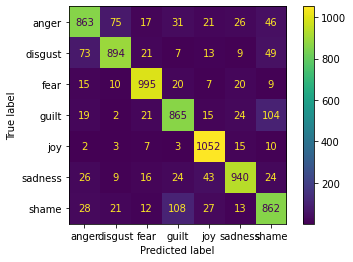

0.8609632783395423
(0.8608127749520335, 0.8605687576863944, 0.8602827413132303, None)


In [70]:
ConfusionMatrixDisplay.from_predictions(df.emosi, y_pred_string)
plt.show()
print(accuracy_score(df.emosi, y_pred_string))
print(precision_recall_fscore_support(df.emosi, y_pred_string, average='macro'))

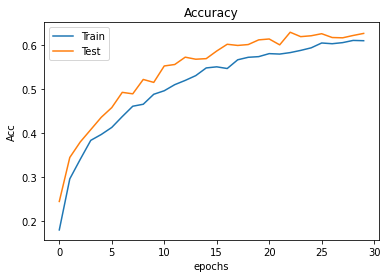

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

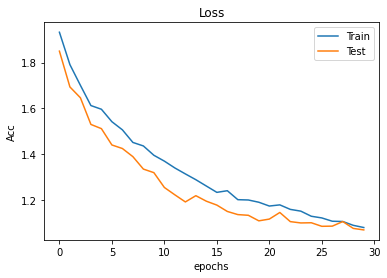

In [38]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [39]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 1s 11ms/step - loss: 1.0708 - accuracy: 0.6257


[1.0707762241363525, 0.6256648898124695]